# Case Study: Sales and Profit Analysis of a Retail Dataset

### Objective
### Analyze sales and profit data to identify the most profitable products and categories, clean the dataset, and visualize key insights.



## Load and Inspect the Dataset :

### Before analysis, we need to load the dataset, inspect its structure, and check for missing values or duplicates.

In [2]:
import pandas as pd  # Import pandas

# Load the dataset
file_path = "C:\\Users\\patha\\OneDrive\\Desktop\\Case studies\\Bike Sales\\Bike_Sales.xlsx"

# Read the Excel file
df = pd.read_excel(file_path)

# Display basic information about the dataset
df.info()

# Show the first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


## Check for missing values
missing_values = df.isnull().sum()

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Display results
print("Missing Values:\n", missing_values)
print("\nNumber of Duplicate Rows:", duplicate_rows)

# Convert necessary columns to correct types
df["Date"] = pd.to_datetime(df["Date"])  # Ensure Date column is in datetime format
df["Customer_Age"] = df["Customer_Age"].astype(int)  # Ensure age is integer
df["Order_Quantity"] = df["Order_Quantity"].astype(int)  # Ensure order quantity is integer
df["Unit_Cost"] = df["Unit_Cost"].astype(float)  # Convert cost-related columns to float
df["Unit_Price"] = df["Unit_Price"].astype(float)
df["Profit"] = df["Profit"].astype(float)
df["Cost"] = df["Cost"].astype(float)
df["Revenue"] = df["Revenue"].astype(float)

# Verify changes
df.info()

## Data Cleaning

### Remove duplicates to ensure accuracy in analysis.
### Convert data types if necessary.

In [4]:
# Remove duplicate rows  
df = df.drop_duplicates()  

# Verify duplicates are removed  
print("Number of Duplicate Rows after removal:", df.duplicated().sum())  


Number of Duplicate Rows after removal: 0


## Exploratory Data Analysis (EDA)

## A. Summary Statistics

### Get an overview of key numerical columns like profit, cost, revenue, etc.

In [5]:
# Summary statistics  
print(df.describe())  


                                Date            Day           Year  \
count                         112036  112036.000000  112036.000000   
mean   2014-11-23 05:22:32.008282880      15.665607    2014.400925   
min              2011-01-01 00:00:00       1.000000    2011.000000   
25%              2013-12-22 00:00:00       8.000000    2013.000000   
50%              2014-06-27 00:00:00      16.000000    2014.000000   
75%              2016-01-09 00:00:00      23.000000    2016.000000   
max              2016-07-31 00:00:00      31.000000    2016.000000   
std                              NaN       8.781485       1.273327   

        Customer_Age  Order_Quantity      Unit_Cost     Unit_Price  \
count  112036.000000   112036.000000  112036.000000  112036.000000   
mean       35.919508       11.904254     267.819603     453.850628   
min        17.000000        1.000000       1.000000       2.000000   
25%        28.000000        2.000000       2.000000       5.000000   
50%        35.00000

## B. Profit by Product Category

### Find out which product category generated the highest profit.

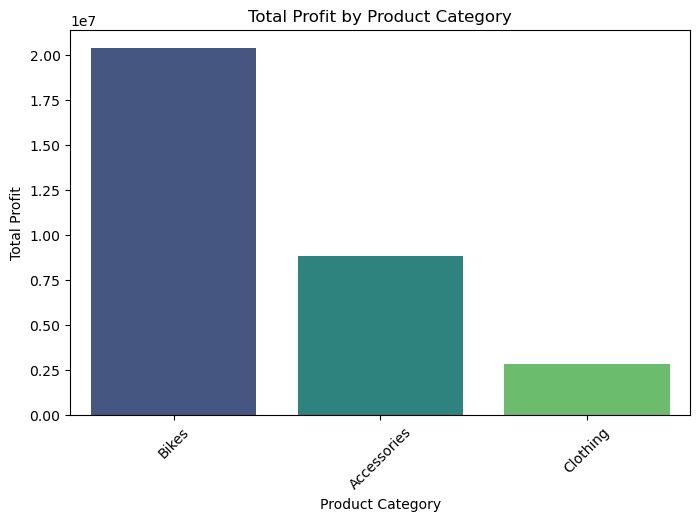

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (replace with your actual dataset)
# df = pd.read_csv("your_data.csv")

# Grouping by Product Category and summing profit
profit_by_category = df.groupby("Product_Category")["Profit"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=profit_by_category.index, y=profit_by_category.values, hue=profit_by_category.index, palette="viridis", legend=False)
plt.xlabel("Product Category")
plt.ylabel("Total Profit")
plt.title("Total Profit by Product Category")
plt.xticks(rotation=45)
plt.show()


## C. Top 10 Most Profitable Products

### Identify which individual products contributed the most to profits.

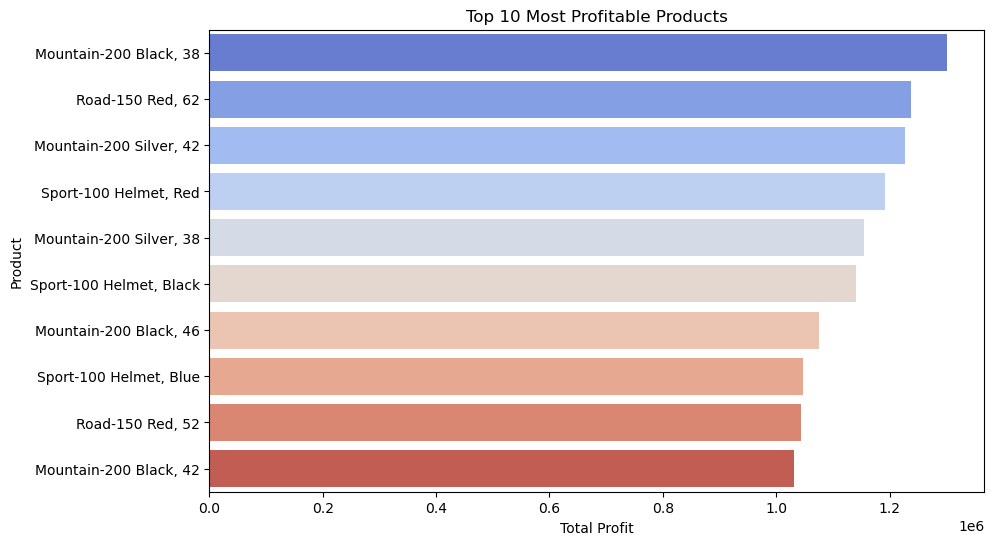

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping by Product and summing profit
top_products = df.groupby("Product")["Profit"].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(y=top_products.index, x=top_products.values, hue=top_products.index, palette="coolwarm", legend=False)
plt.xlabel("Total Profit")
plt.ylabel("Product")
plt.title("Top 10 Most Profitable Products")
plt.show()


## D. Profit Trends Over Time

### Examine how profit changed over the years.

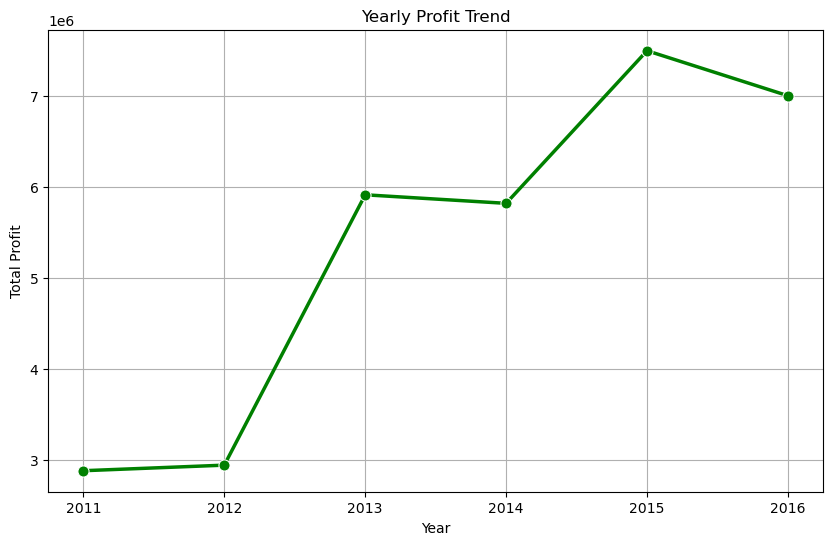

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping profit by year
profit_trend = df.groupby("Year")["Profit"].sum()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=profit_trend.index, y=profit_trend.values, marker="o", markersize=8, linewidth=2.5, color="green")
plt.xlabel("Year")
plt.ylabel("Total Profit")
plt.title("Yearly Profit Trend")
plt.grid(True)  # Adds grid for better readability
plt.show()


# Conclusion 

### Based on our analysis:

## The Bikes category generated the highest profit.
## Mountain-200 Black, 38 was the most profitable product.
## Profit has shown an increasing trend over the years.
## Investing more in high-profit products can drive business growth.